Задание 1: К алгоритму kNN, реализованному на уроке, реализовать добавление весов для соседей в зависимости от номера соседа

In [170]:
import numpy as np
from sklearn import model_selection
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import pandas as pd

In [116]:
X, y = load_iris(return_X_y=True)

# Для наглядности возьмем только первые два признака (всего в датасете их 4)
X = X[:, :2]

In [117]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=1)

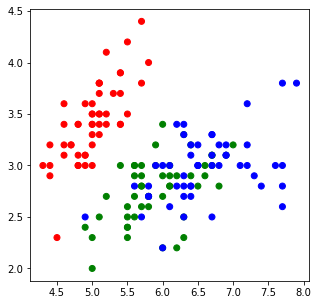

In [118]:
cmap = ListedColormap(['red', 'green', 'blue'])
plt.figure(figsize=(5, 5))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap)

In [119]:
# Добавление весов в  зависимости от номера соседа к качестве базы 0,9**i

class Knn_w_num():
    def __init__ (self):
        self.x_train=None
        self.y_train=None
        self.x_test=None
        self.k=None
        self.answer = None
        self.q=None
        
    def e_metrics(self,x1, x2):   

        return np.sqrt(((x1-x2)**2).sum())  
    
    def predict(self,x_train, y_train, x_test, k,q=0.9):
        self.x_train=x_train
        self.y_train=y_train
        self.x_test=x_test
        self.k=k 
        self.q=q
        
        answers = []
        for x in x_test:
            test_distances = []

            for i in range(len(x_train)):

                # расчет расстояния от классифицируемого объекта до
                # объекта обучающей выборки
                distance = self.e_metrics(x, x_train[i])

                # Записываем в список значение расстояния и ответа на объекте обучающей выборки
                test_distances.append((distance, y_train[i]))

            # создаем словарь со всеми возможными классами
            classes = {class_item: 0 for class_item in set(y_train)}

#             создадим список весов
            w=[q**i for i in range(k)]
            # Сортируем список и среди первых k элементов подсчитаем частоту появления разных классов           
            for i,d in enumerate(sorted(test_distances)[0:k]):
                classes[d[1]] += w[i]

            
            # Записываем в список ответов наиболее часто встречающийся класс
            answers.append(sorted(classes, key=classes.get)[-1])
        self.answer = answers
        return answers
    
    def accuracy(self,y):
        return (sum(self.answer == y) / len(y))

In [140]:
test = Knn_w_num()

In [141]:
y_pred1 = test.predict(X_train, y_train, X_test, 5,q=0.95)

In [142]:
test.accuracy(y_test)

0.8666666666666667


Задание 2: К алгоритму kNN, реализованному на уроке, реализовать добавление весов для соседей в зависимости от расстояния до соседа. Сравнить метрики качества и сложность разделяющей гиперплоскости. Сделать выводы.

In [146]:
# Добавление весов в  зависимости от растояния  𝑤(𝑑)=𝑞**𝑑 ,  𝑞∈(0,1) 

class Knn_w_distance():
    def __init__ (self):
        self.x_train=None
        self.y_train=None
        self.x_test=None
        self.k=None
        self.answer = None
        self.q=None
        
    def e_metrics(self,x1, x2):   
        return np.sqrt(((x1-x2)**2).sum())  
    
    def predict(self,x_train, y_train, x_test, k,q=0.9):
        self.x_train=x_train
        self.y_train=y_train
        self.x_test=x_test
        self.k=k 
        self.q=q
        
        answers = []
        for x in x_test:
            test_distances = []

            for i in range(len(x_train)):

                # расчет расстояния от классифицируемого объекта до
                # объекта обучающей выборки
                distance = self.e_metrics(x, x_train[i])

                # Записываем в список значение расстояния и ответа на объекте обучающей выборки
                test_distances.append((distance, y_train[i]))

            # создаем словарь со всеми возможными классами
            classes = {class_item: 0 for class_item in set(y_train)}


            # Сортируем список и среди первых k элементов подсчитаем частоту появления разных классов           
            for d in sorted(test_distances)[0:k]:
                classes[d[1]] += q**d[0]  
            
            # Записываем в список ответов наиболее часто встречающийся класс
            answers.append(sorted(classes, key=classes.get)[-1])
        self.answer = answers
        return answers
    
    def accuracy(self,y):
        return (sum(self.answer == y) / len(y))

In [192]:
def testing_algoritms():
    test2 = Knn_w_distance()
    test1 = Knn_w_num()
    results  = pd.DataFrame(columns=['k','q','num','dist'])
    for i in [0.4,0.5,0.6,0.7,0.8,0.9]:
        for j in range(2,31,2):
            test1.predict(X_train, y_train, X_test, j,q=i)
            test2.predict(X_train, y_train, X_test, j,q=i)
            results.loc[len(results)]=[j,i,test1.accuracy(y_test),test2.accuracy(y_test)]
    return results        

In [234]:
def get_graph(X_train, y_train, k,model='num'):
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])

    h = .02

    # Расчет пределов графика
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Получим предсказания для всех точек
    if model!='num':
        t=Knn_w_distance()
        Z = t.predict(X_train, y_train, np.c_[xx.ravel(), yy.ravel()], k)
    else:
        t=Knn_w_num()
        Z = t.predict(X_train, y_train, np.c_[xx.ravel(), yy.ravel()], k)    

    # Построим график
    Z = np.array(Z).reshape(xx.shape)
    plt.figure(figsize=(7,7))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Добавим на график обучающую выборку
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f"Трехклассовая kNN классификация при k = {k}")
    plt.show()

In [194]:
res_test =  testing_algoritms()           
            

In [212]:
res_test.sort_values(by=['num','dist'],ascending=False).head(25)

,k,q,num,dist
66,14.0,0.8,0.866667,0.833333
67,16.0,0.8,0.866667,0.833333
69,20.0,0.8,0.866667,0.833333
73,28.0,0.8,0.866667,0.833333
74,30.0,0.8,0.866667,0.833333
79,10.0,0.9,0.866667,0.833333
81,14.0,0.9,0.866667,0.833333
82,16.0,0.9,0.866667,0.833333
84,20.0,0.9,0.866667,0.833333
88,28.0,0.9,0.866667,0.833333


In [215]:
res_test.sort_values(by=['dist','num'],ascending=False).head(25)

,k,q,num,dist
66,14.0,0.8,0.866667,0.833333
67,16.0,0.8,0.866667,0.833333
69,20.0,0.8,0.866667,0.833333
73,28.0,0.8,0.866667,0.833333
74,30.0,0.8,0.866667,0.833333
79,10.0,0.9,0.866667,0.833333
81,14.0,0.9,0.866667,0.833333
82,16.0,0.9,0.866667,0.833333
84,20.0,0.9,0.866667,0.833333
88,28.0,0.9,0.866667,0.833333


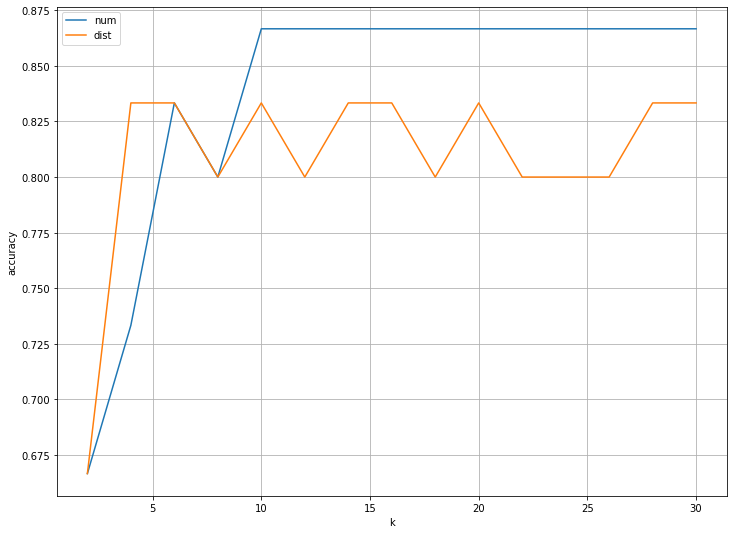

In [229]:
# Максимальные значения метрик при разных q
plt.figure(figsize=(12, 9))
plt.grid()
plt.plot(res_test.groupby(by=['k']).max().index,res_test.groupby(by=['k']).max()['num'],label = 'num')
plt.plot(res_test.groupby(by=['k']).max().index,res_test.groupby(by=['k']).max()['dist'],label = 'dist')
plt.xlabel('k')
plt.ylabel('accuracy')
plt.legend()

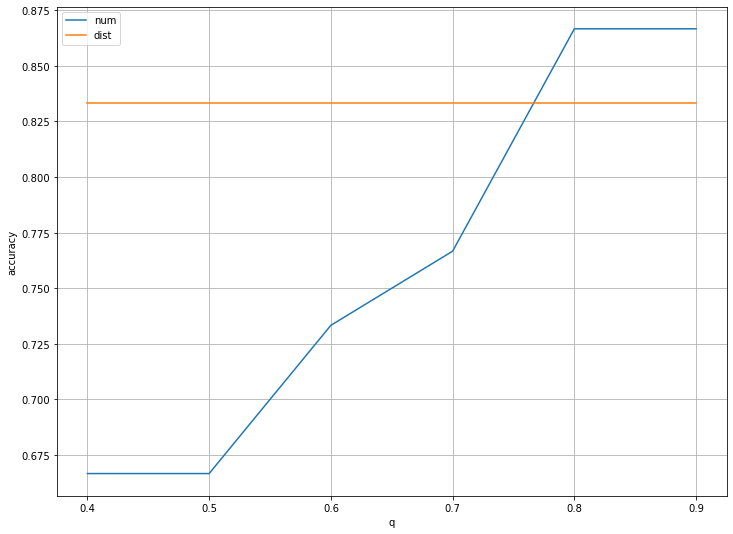

In [231]:
# Максимальные значения метрик при заных k
plt.figure(figsize=(12, 9))
plt.grid()
plt.plot(res_test.groupby(by=['q']).max().index,res_test.groupby(by=['q']).max()['num'],label = 'num')
plt.plot(res_test.groupby(by=['q']).max().index,res_test.groupby(by=['q']).max()['dist'],label = 'dist')
plt.xlabel('q')
plt.ylabel('accuracy')
plt.legend()

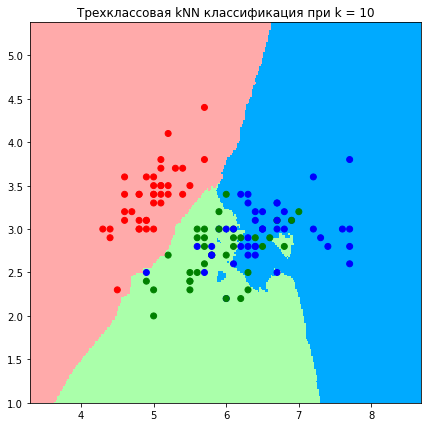

In [235]:
get_graph(X_train, y_train, 10,model='num')

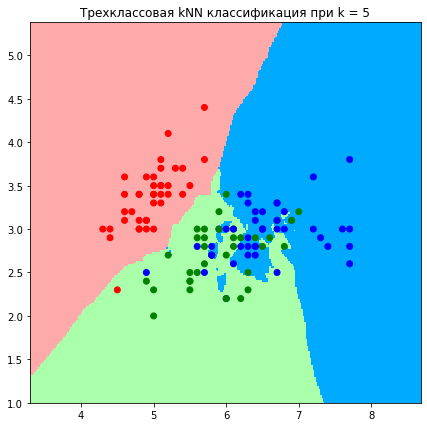

In [236]:
get_graph(X_train, y_train, 5,model='dist')

Модель с использованием весов по номеру соседа мне показалась проще и  качесмтво предсказаний на тней выше

Задание 3: Настроить оптимальное значение числа соседей для моделей из п.1 и п.2, сделать выводы.

Как видно из графикоф оптимальное минимальное значение параметров
k и q для модели с весами в зщависимости от номера сосдеа составляет:

q = 0.8

k = 10

для модели с весами в зависимости от растояния :

q = не вдияет

k = 4